In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Ajout de l'import pour plt
import seaborn as sns
from datetime import datetime

📁Step 1: Load the dataset

 We start by loading the dataset containing club statistics.

In [3]:
# Charger votre dataset (remplacez par le chemin de votre fichier)
df = pd.read_csv(r"C:\Users\MSI\OneDrive - ESPRIT\Bureau\all_coaches_extend.csv", sep=';')


In [99]:
# Dataset First Look
print(df.head())

                   name          club  age place_of_birth citizenship  \
0         Pep Guardiola      Man City   50      Santpedor       Spain   
1  Ole Gunnar Solskjaer  Without Club   48   Kristiansund      Norway   
2         Thomas Tuchel       Chelsea   48       Krumbach     Germany   
3          Jürgen Klopp     Liverpool   54      Stuttgart     Germany   
4   Nuno Espírito Santo  Without Club   47       São Tomé    Portugal   

  appointment_date contract_until_date   coaching_licence avg_term_as_coach  \
0       01/07/2016          30/06/2023                SEG        3.38 Years   
1              NaN                 NaN      Jim Solbakken        2.05 Years   
2       26/01/2021          30/06/2024  Dr. Olaf Meinking        2.28 Years   
3       08/10/2015          30/06/2024   UEFA Pro Licence        5.40 Years   
4              NaN                 NaN          Gestifute        1.76 Years   

  preffered_formation  current_league current_league_country salary  
0     4-3-3 Atta

In [100]:
# Dataset Rows & Columns count
print(df.shape)

(4000, 13)


In [101]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   name                    4000 non-null   object
 1   club                    4000 non-null   object
 2   age                     4000 non-null   int64 
 3   place_of_birth          4000 non-null   object
 4   citizenship             4000 non-null   object
 5   appointment_date        3985 non-null   object
 6   contract_until_date     3984 non-null   object
 7   coaching_licence        4000 non-null   object
 8   avg_term_as_coach       4000 non-null   object
 9   preffered_formation     3999 non-null   object
 10  current_league          4000 non-null   object
 11  current_league_country  4000 non-null   object
 12  salary                  3901 non-null   object
dtypes: int64(1), object(12)
memory usage: 406.4+ KB


In [102]:
# Dataset Duplicate Value Count
df.duplicated().sum()

1

In [103]:
# Missing Values/Null Values Count

df.isnull().sum()

name                       0
club                       0
age                        0
place_of_birth             0
citizenship                0
appointment_date          15
contract_until_date       16
coaching_licence           0
avg_term_as_coach          0
preffered_formation        1
current_league             0
current_league_country     0
salary                    99
dtype: int64

In [104]:
# Dataset Columns
df.columns

Index(['name', 'club', 'age', 'place_of_birth', 'citizenship',
       'appointment_date', 'contract_until_date', 'coaching_licence',
       'avg_term_as_coach', 'preffered_formation', 'current_league',
       'current_league_country', 'salary'],
      dtype='object')

.name : Coach's name

.club : Current club of the coach (or "Without Club" if not associated with any club)

.birth_date : Coach's date of birth

.age : Coach's age

.place_of_birth : City or region of birth

.citizenship : Coach's nationality

.appointment_date : Date of appointment to the current position

.contract_until_date : Contract expiration date

.coaching_licence : Coaching license held (e.g., UEFA Pro Licence)

.avg_term_as_coach : Average tenure as a coach (in years)

.current_league : League where the coach currently works (e.g., Serie A)

.current_league_country : Country of the current league

.salary : Coach's salary

In [105]:
# Dataset Describe
df.describe()

,age
count,4000.000000
mean,49.874250
std,11.636593
min,30.000000
25%,40.000000
50%,50.000000
75%,60.000000
max,70.000000


In [106]:
# Check Unique Values for each variable.
for i in df.columns:
  print("No. of unique values in ",i,"is", df[i].nunique())

No. of unique values in  name is 3891
No. of unique values in  club is 3683
No. of unique values in  age is 41
No. of unique values in  place_of_birth is 3503
No. of unique values in  citizenship is 247
No. of unique values in  appointment_date is 2416
No. of unique values in  contract_until_date is 1611
No. of unique values in  coaching_licence is 45
No. of unique values in  avg_term_as_coach is 416
No. of unique values in  preffered_formation is 15
No. of unique values in  current_league is 957
No. of unique values in  current_league_country is 244
No. of unique values in  salary is 3879


In [107]:

#  Nombre total d'entraîneurs sans club
print("No. of coaches without a club :", df[df['club'] == 'Without Club'].club.count())

# Extraction des entraîneurs sans club
without_club_df = df[df['club'] == 'Without Club']

# Nombre total de nationalités uniques
print("No. of unique nationalities :", df['citizenship'].nunique())

# Nombre d'entraîneurs avec une licence UEFA Pro
print("No. of coaches with UEFA Pro Licence :", df[df['coaching_licence'] == 'UEFA Pro Licence']['coaching_licence'].count())

# Nombre d'entraîneurs préférant la formation 4-2-3-1
print("No. of coaches preferring 4-2-3-1 formation :", df[df['preffered_formation'] == '4-2-3-1']['preffered_formation'].count())

#  Extraction des entraîneurs de Serie A
serie_a_coaches = df[df['current_league'] == 'Serie A']
print("No. of coaches in Serie A :", serie_a_coaches.shape[0])

# Afficher le DataFrame des entraîneurs sans club
without_club_df


No. of coaches without a club : 15
No. of unique nationalities : 247
No. of coaches with UEFA Pro Licence : 818
No. of coaches preferring 4-2-3-1 formation : 809
No. of coaches in Serie A : 21


,name,club,age,place_of_birth,citizenship,appointment_date,contract_until_date,coaching_licence,avg_term_as_coach,preffered_formation,current_league,current_league_country,salary
1,Ole Gunnar Solskjaer,Without Club,48,Kristiansund,Norway,NaN,NaN,Jim Solbakken,2.05 Years,4-2-3-1,Premier League,England,NaN
4,Nuno Espírito Santo,Without Club,47,São Tomé,Portugal,NaN,NaN,Gestifute,1.76 Years,03/04/2003,Premier League,England,NaN
16,Daniel Farke,Without Club,45,Steinhausen,Germany,NaN,NaN,UEFA Pro Licence,4.07 Years,4-2-3-1,Premier League,England,NaN
33,Luca Gotti,Without Club,54,Adria,Italy,NaN,NaN,UEFA Pro Licence,1.31 Years,3-5-2 flat,Serie A,Italy,NaN
34,Davide Ballardini,Without Club,58,Ravenna,Italy,NaN,NaN,P&P Sport ...,0.96 Years,3-5-2 flat,Serie A,Italy,NaN
43,Ronald Koeman,Without Club,58,Zaandam,Netherlands,NaN,NaN,Wasserman,1.65 Years,4-3-3 Attacking,La Liga,Spain,NaN
53,Javier Pereira,Without Club,55,Badajoz,Spain,NaN,NaN,"SOCCERMEDIA, S.L.",1.36 Years,05/03/2002,La Liga,Spain,NaN
57,Javier Calleja,Without Club,43,Madrid,Spain,NaN,NaN,AIS Management,1.15 Years,4-3-3 Attacking,La Liga,Spain,NaN
60,Fran Escribá,Without Club,56,Valencia,Spain,NaN,NaN,Licence trainer,1.22 Years,04/04/2002,La Liga,Spain,NaN
62,Niko Kovac,Without Club,50,Berlin,Croatia,NaN,NaN,Alen Augustincic,1.58 Years,4-4-2 double 6,Ligue 1,France,NaN


In [108]:

#  Nombre total d'entraîneurs
total_coaches = df.shape[0]
print("Total no. of coaches :", total_coaches)

# Nombre total d'entraîneurs sans club
without_club_count = df[df['club'] == 'Without Club'].shape[0]

# Calcul du pourcentage d'entraîneurs sans club
perc_without_club = (without_club_count / total_coaches) * 100
print(f"Percentage of coaches without a club : {round(perc_without_club, 2)}%")

Total no. of coaches : 4000
Percentage of coaches without a club : 0.38%


In [109]:

# Regrouper les entraîneurs sans club par nationalité et afficher les ligues uniques
country_league_churn = df[df['club'] == 'Without Club'].groupby(['citizenship'])['current_league'].unique().reset_index(name='Unique leagues')

# Affichage du DataFrame
country_league_churn

,citizenship,Unique leagues
0,Croatia,[Ligue 1]
1,France,[Ligue 1]
2,Germany,[Premier League]
3,Hungary,[Bundesliga]
4,Italy,[Serie A]
5,Netherlands,"[La Liga, Bundesliga]"
6,Norway,[Premier League]
7,Portugal,[Premier League]
8,Spain,[La Liga]
9,United States,[Bundesliga]


club
With Club       3984
Without Club      15
Name: count, dtype: int64
 


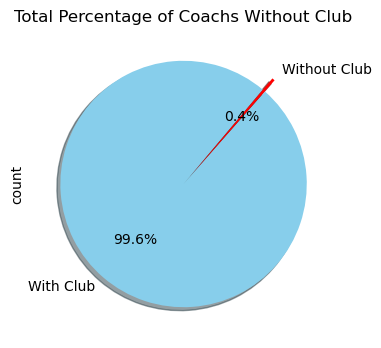

In [30]:
#  Comptage des entraîneurs avec et sans club
club_status_counts = df['club'].apply(lambda x: 'Without Club' if x == 'Without Club' else 'With Club').value_counts()
print(club_status_counts)
print(" ")

#  Visualisation en graphique circulaire
plt.figure(figsize=(4,4))
club_status_counts.plot(kind='pie', 
                        autopct="%1.1f%%", 
                        startangle=50, 
                        shadow=True, 
                        labels=['With Club', 'Without Club'], 
                        colors=['skyblue', 'red'], 
                        explode=[0, 0.12])

plt.title('Total Percentage of Coachs Without Club')
plt.show()

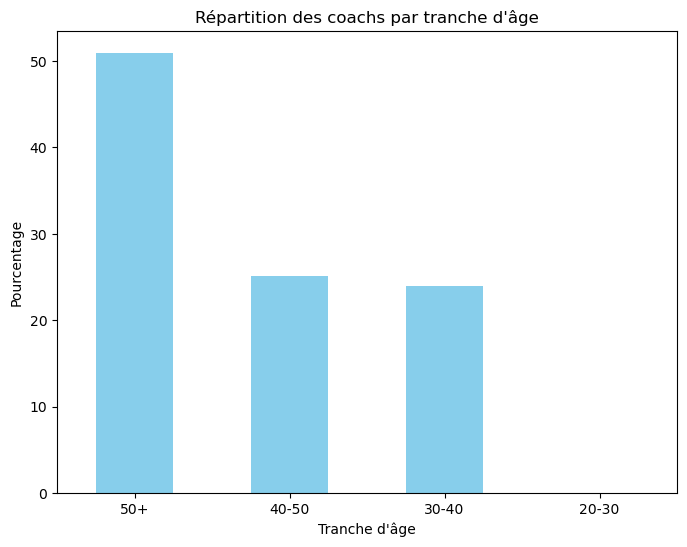

In [111]:

# Définir les tranches d'âges
bins = [20, 30, 40, 50, float('inf')]  # Tranches : 20-30, 30-40, 40-50, 50+
labels = ['20-30', '30-40', '40-50', '50+']  # Ajout d'un label pour 30-40

# Calculer les pourcentages par tranche d'âge sans ajouter une colonne
age_group_counts = pd.cut(df['age'], bins=bins, labels=labels, right=False).value_counts(normalize=True) * 100

# Affichage de l'histogramme
plt.figure(figsize=(8, 6))
age_group_counts.plot(kind='bar', color='skyblue')
plt.title('Répartition des coachs par tranche d\'âge')
plt.xlabel('Tranche d\'âge')
plt.ylabel('Pourcentage')
plt.xticks(rotation=0)
plt.show()

In [112]:

# Afficher les différentes citoyennetés avec leurs occurrences
citizenship_counts = df['citizenship'].value_counts()

print("Répartition des citoyennetés :")
print(citizenship_counts)

Répartition des citoyennetés :
citizenship
Spain               37
Korea               37
Italy               36
France              35
Congo               34
                    ..
Uganda               6
England              4
United States        2
Northern Ireland     1
Scotland             1
Name: count, Length: 247, dtype: int64


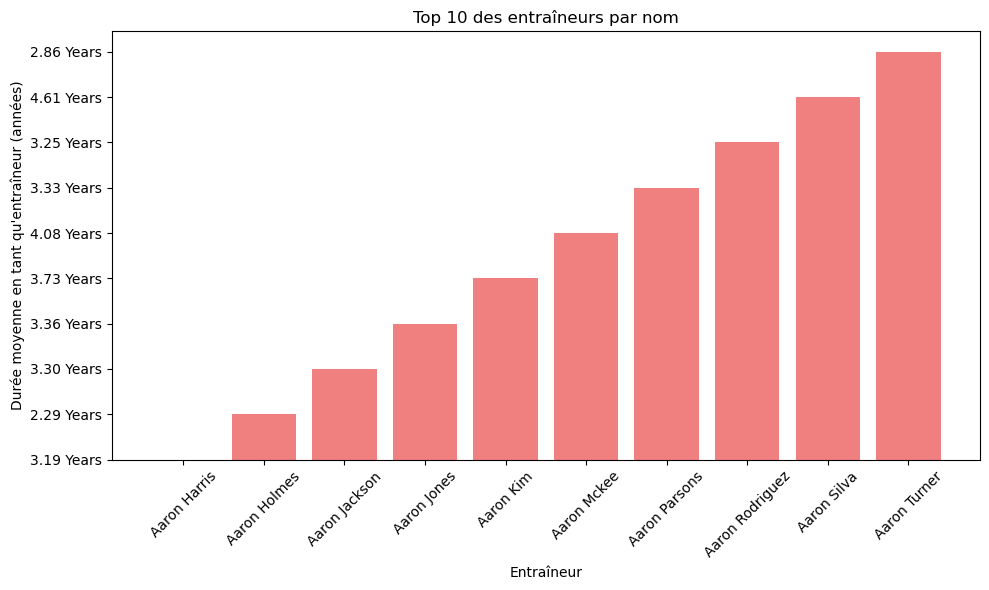

In [4]:
# Trier les entraîneurs par nom (ordre alphabétique)
top_10_by_name = df.sort_values(by='name').head(10)

# Affichage graphique (bar plot) des top 10 entraîneurs par nom
plt.figure(figsize=(10, 6))
plt.bar(top_10_by_name['name'], top_10_by_name['avg_term_as_coach'], color='lightcoral')
plt.xlabel('Entraîneur')
plt.ylabel('Durée moyenne en tant qu\'entraîneur (années)')
plt.title('Top 10 des entraîneurs par nom')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

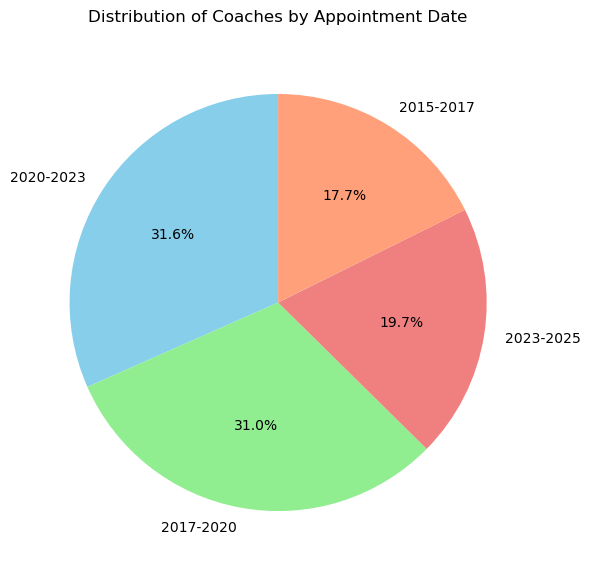

In [6]:
# Convertir la colonne 'appointment_date' en type datetime
df['appointment_date'] = pd.to_datetime(df['appointment_date'], format='%d/%m/%Y')

# Définir les tranches de dates
bins = [pd.Timestamp('2015-01-01'), pd.Timestamp('2017-01-01'), pd.Timestamp('2020-01-01'), pd.Timestamp('2023-01-01'), pd.Timestamp('2025-01-01')]
labels = ['2015-2017', '2017-2020', '2020-2023', '2023-2025']

# Calculer les fréquences des coachs dans chaque période
period_counts = pd.cut(df['appointment_date'], bins=bins, labels=labels, right=False).value_counts(normalize=True) * 100

# Affichage graphique circulaire des pourcentages des périodes
plt.figure(figsize=(6, 6))  # Taille de la figure plus petite
plt.pie(period_counts, labels=period_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon'])
plt.title('Distribution of Coaches by Appointment Date')
plt.axis('equal')  # Pour que le graphique soit un cercle
plt.tight_layout()
plt.show()

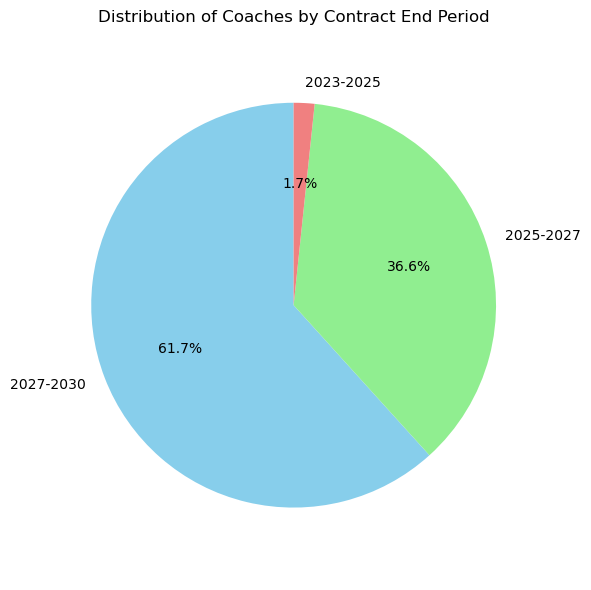

In [5]:
# Convertir la colonne 'contract_until_date' en type datetime
df['contract_until_date'] = pd.to_datetime(df['contract_until_date'], format='%d/%m/%Y')

# Définir les tranches de dates
bins = [pd.Timestamp('2023-01-01'), pd.Timestamp('2025-01-01'), pd.Timestamp('2027-01-01'), pd.Timestamp('2030-01-01')]
labels = ['2023-2025', '2025-2027', '2027-2030']

# Calculer les fréquences des coachs dans chaque période
contract_period_counts = pd.cut(df['contract_until_date'], bins=bins, labels=labels, right=False).value_counts(normalize=True) * 100

# Affichage graphique circulaire des pourcentages des périodes
plt.figure(figsize=(6, 6))  # Taille de la figure plus petite
plt.pie(contract_period_counts, labels=contract_period_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Coaches by Contract End Period')
plt.axis('equal')  # Pour que le graphique soit un cercle
plt.tight_layout()
plt.show()

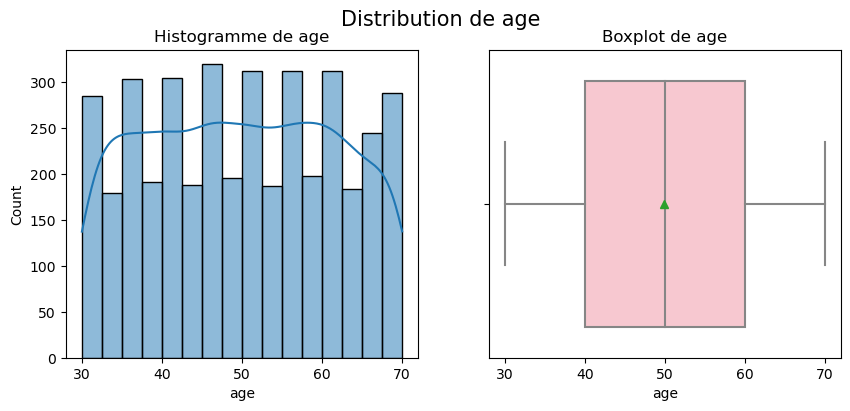

In [116]:
# Chart  Visualizing code of histogram plot & boxplot for each columns to know the data distribution , and outliers detections
# Sélectionner uniquement les colonnes numériques
numeric_columns = df.select_dtypes(include=['number']).columns

# Créer les graphiques pour chaque colonne numérique
for col in numeric_columns:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    
    # Histogramme avec estimation de densité (kde)
    sns.histplot(df[col], ax=axes[0], kde=True)
    axes[0].set_title(f"Histogramme de {col}")
    
    # Boxplot pour détecter les outliers
    sns.boxplot(x=df[col], ax=axes[1], orient='h', showmeans=True, color='pink')
    axes[1].set_title(f"Boxplot de {col}")
    
    # Titre général du graphique
    fig.suptitle(f"Distribution de {col}", fontsize=15)
    
    # Afficher le graphique
    plt.show()

In [8]:

def encode_league_countries(df):
    # Définir l'ordre personnalisé des pays
    custom_country_order = [
        'England', 'Spain', 'Germany', 'Italy', 'France', 'Portugal', 'Netherlands', 
        'Belgium', 'Russia', 'Turkey', 'Brazil', 'Argentina', 'Mexico', 'USA'
    ]

    # Créer un type catégoriel ordonné avec l'ordre défini
    custom_country_category = pd.CategoricalDtype(categories=custom_country_order, ordered=True)

    # Appliquer l'encodage ordinal à la colonne 'current_league_country'
    df['current_league_country'] = df['current_league_country'].astype(custom_country_category)
    df['league_country_encoded'] = df['current_league_country'].cat.codes

    return df

# Appliquer la fonction au dataset
df = encode_league_countries(df)

# Afficher l'encodage de chaque pays unique
unique_encodings = df[['current_league_country', 'league_country_encoded']].drop_duplicates()
print(unique_encodings.sort_values(by='league_country_encoded'))



     current_league_country  league_country_encoded
99                      NaN                      -1
0                   England                       0
41                    Spain                       1
81                  Germany                       2
20                    Italy                       3
61                   France                       4
832                Portugal                       5
2149            Netherlands                       6
164                 Belgium                       7
127                  Turkey                       9
113                  Brazil                      10
558               Argentina                      11
249                  Mexico                      12


In [9]:

def encode_leagues(df):
    # Définir l'ordre personnalisé des ligues
    custom_league_order = [
        'Premier League', 'La Liga', 'Bundesliga', 'Serie A', 'Ligue 1', 
        'Eredivisie', 'Primeira Liga', 'Belgian Pro League', 'Russian Premier League',
        'Turkish Süper Lig', 'MLS', 'Brasileirão', 'Argentine Primera División'
    ]

    # Créer un type catégoriel ordonné
    custom_league_category = pd.CategoricalDtype(categories=custom_league_order, ordered=True)

    # Appliquer l'encodage ordinal
    df['current_league'] = df['current_league'].astype(custom_league_category)
    df['league_encoded'] = df['current_league'].cat.codes

    return df

# Appliquer la fonction au dataset
df = encode_leagues(df)

# Afficher l'encodage des ligues
print("\nEncodage des ligues :")
print(df[['current_league', 'league_encoded']].drop_duplicates().sort_values(by='league_encoded'))


Encodage des ligues :
    current_league  league_encoded
99             NaN              -1
0   Premier League               0
41         La Liga               1
81      Bundesliga               2
20         Serie A               3
61         Ligue 1               4


In [10]:
# Convertir la colonne en format datetime
# Supposons que ta colonne s'appelle 'date_column'
df['contract_until_date'] = pd.to_datetime(df['contract_until_date'], format='%d/%m/%Y')
df['appointment_date'] = pd.to_datetime(df['appointment_date'], format='%d/%m/%Y')
# Convertir en object temporairement
df['current_league'] = df['current_league'].astype('object')
df['current_league_country'] = df['current_league_country'].astype('object')


# Vérifier le type de la colonne après conversion
print(df.dtypes)

name                              object
club                              object
age                                int64
place_of_birth                    object
citizenship                       object
appointment_date          datetime64[ns]
contract_until_date       datetime64[ns]
coaching_licence                  object
avg_term_as_coach                 object
preffered_formation               object
current_league                    object
current_league_country            object
salary                            object
league_country_encoded              int8
league_encoded                      int8
dtype: object


In [11]:
# Suppression des espaces inutiles
df['salary'] = df['salary'].str.strip()

# Suppression des devises et conversion en float
df['salary'] = df['salary'].str.replace(r'[^\d.]', '', regex=True).astype(float)

# Vérification des valeurs manquantes après conversion
print(df['salary'].isnull().sum())



99


In [12]:
df['salary'].fillna(df['salary'].median(), inplace=True)
print(df['salary'].isnull().sum())


0


In [13]:
print(df.dtypes)

name                              object
club                              object
age                                int64
place_of_birth                    object
citizenship                       object
appointment_date          datetime64[ns]
contract_until_date       datetime64[ns]
coaching_licence                  object
avg_term_as_coach                 object
preffered_formation               object
current_league                    object
current_league_country            object
salary                           float64
league_country_encoded              int8
league_encoded                      int8
dtype: object


In [14]:
df['club'].fillna('Unknown', inplace=True)
df['place_of_birth'].fillna('Unknown', inplace=True)
df['citizenship'].fillna('Unknown', inplace=True)
df['preffered_formation'].fillna('Unknown', inplace=True)




In [15]:
df['age'].fillna(df['age'].median(), inplace=True)

In [16]:
median_appointment = df['appointment_date'].median()
median_contract = df['contract_until_date'].median()

df['appointment_date'].fillna(median_appointment, inplace=True)
df['contract_until_date'].fillna(median_contract, inplace=True)


In [17]:
most_frequent_league = df['current_league'].mode()[0]  # Trouver la ligue la plus fréquente
most_frequent_country = df['current_league_country'].mode()[0]  # Trouver le pays de ligue le plus fréquent

df['current_league'].fillna(most_frequent_league, inplace=True)
df['current_league_country'].fillna(most_frequent_country, inplace=True)


In [18]:
# Vérification des valeurs manquantes restantes
print(df.isnull().sum())

name                      0
club                      0
age                       0
place_of_birth            0
citizenship               0
appointment_date          0
contract_until_date       0
coaching_licence          0
avg_term_as_coach         0
preffered_formation       0
current_league            0
current_league_country    0
salary                    0
league_country_encoded    0
league_encoded            0
dtype: int64


In [19]:
print(df.dtypes)


name                              object
club                              object
age                                int64
place_of_birth                    object
citizenship                       object
appointment_date          datetime64[ns]
contract_until_date       datetime64[ns]
coaching_licence                  object
avg_term_as_coach                 object
preffered_formation               object
current_league                    object
current_league_country            object
salary                           float64
league_country_encoded              int8
league_encoded                      int8
dtype: object


In [20]:
df['years_as_coach'] = (pd.to_datetime('today') - df['appointment_date']).dt.days // 365
df['contract_remaining_years'] = (df['contract_until_date'] - pd.to_datetime('today')).dt.days // 365
print(df[['years_as_coach', 'contract_remaining_years']].head())


   years_as_coach  contract_remaining_years
0               8                        -2
1               4                         2
2               4                        -1
3               9                        -1
4               4                         2


In [25]:
# Suppression des doublons
df.drop_duplicates(inplace=True)

In [26]:
df.to_csv('df_data_encoded.csv', index=False)


years_as_coach:	Nombre d'années d'expérience comme entraîneur  Utilité:	Évaluer l'expérience et la performance d'un coach
contract_remaining_years : Nombre d'années restantes avant la fin du contrat actuel Utilité:Suivi des mouvements de coachs et planification des recrutements

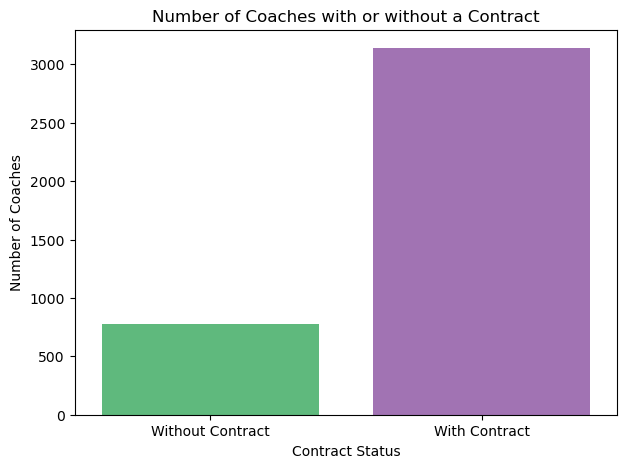

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv(r"C:\Users\MSI\OneDrive - ESPRIT\Bureau\df_data_encoded.csv")

# Check if the column 'contract_remaining_years' exists
if 'contract_remaining_years' in df.columns:
    # Filter coaches with and without a contract
    num_coaches_no_contract = (df['contract_remaining_years'] == 0).sum()
    num_coaches_with_contract = (df['contract_remaining_years'] > 0).sum()

    # Create a DataFrame for visualization
    contract_status = pd.DataFrame({
        'Contract Status': ['Without Contract', 'With Contract'],
        'Number of Coaches': [num_coaches_no_contract, num_coaches_with_contract]
    })

    # Plot the bar chart
    plt.figure(figsize=(7, 5))
    sns.barplot(x='Contract Status', y='Number of Coaches', data=contract_status, palette=['#50C878', '#A569BD'])
    plt.title("Number of Coaches with or without a Contract")
    plt.ylabel("Number of Coaches")
    plt.show()
else:
    print("⚠️ The column 'contract_remaining_years' does not exist in the dataset!")


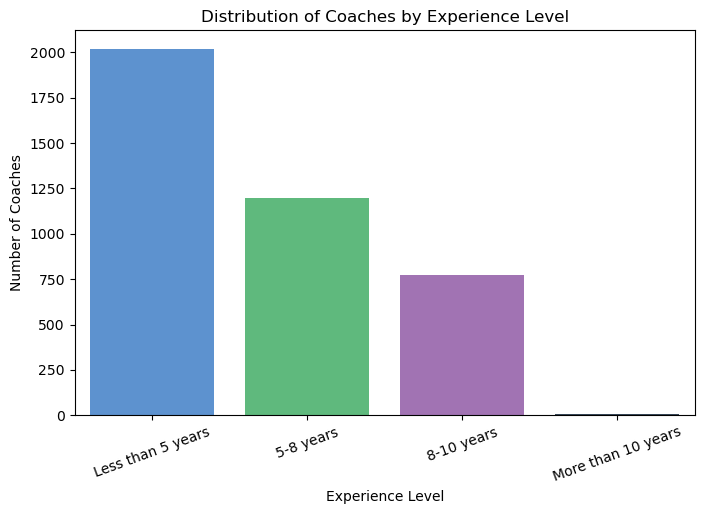

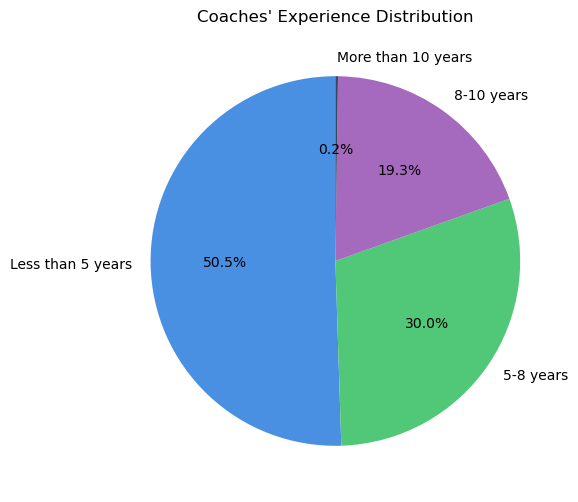

In [29]:

# Check if the column 'years_as_coach' exists
if 'years_as_coach' in df.columns:
    # Define experience categories
    bins = [0, 5, 8, 10, float('inf')]
    labels = ['Less than 5 years', '5-8 years', '8-10 years', 'More than 10 years']
    
    # Categorize coaches
    df['experience_category'] = pd.cut(df['years_as_coach'], bins=bins, labels=labels, right=False)

    # Count the number of coaches per experience category
    experience_counts = df['experience_category'].value_counts().sort_index()

    custom_colors = ["#4A90E2", "#50C878", "#A569BD", "#34495E"]  # Blue, Green, Purple, Gray

    # 📊 Create the bar plot with new colors
    plt.figure(figsize=(8, 5))
    sns.barplot(x=experience_counts.index, y=experience_counts.values, palette=custom_colors)
    plt.title("Distribution of Coaches by Experience Level")
    plt.xlabel("Experience Level")
    plt.ylabel("Number of Coaches")
    plt.xticks(rotation=20)  # Rotate for better readability
    plt.show()

    # 📈 Create the pie chart with new colors
    plt.figure(figsize=(6, 6))
    plt.pie(
        experience_counts,
        labels=experience_counts.index,
        autopct='%1.1f%%',
        colors=custom_colors,
        startangle=90
    )
    plt.title("Coaches' Experience Distribution")
    plt.show()

else:
    print("⚠️ The column 'years_as_coach' does not exist in the dataset!")
